**Hello, Welcome to my mask detection project 👋**

The covid19 virus influence negatively our life since 2019 and the virus the first appearance place in the world was Wuhan city in China, and then spread all over world,from this moment we have to wear a face maske in crowded places such as cafe, restaurant.. While wearing mask is not the ultimate solution, it still reduces the rate of transmission of the virus.In addition much applications were produced by software developers. I would develop this project to solve face mask problem.

**Import Library & Packages**

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import cv2

**Image Preprocessing**

The path is created for getting data and then I concatened dataframes of mask and without mask.

In [2]:
train_data = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
validation_data = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'


Initialize the number of epochs to train,initial learning rate,batch size, and image dimensions. EPOCHS = 50. INIT_LR = 1e-4.

In [3]:
IMG_SIZE = [224, 224]
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

**Arguments**

* **directory:** Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.
* **target_size:** Either None (default to original size) or tuple of ints (img_height, img_width).
* **batch_size:** Size of the batches of data. Default: 32.
* **shuffle:** Whether to shuffle the data. Default: True. If set to False, sorts the data in alphanumeric order.
* **class_mode:** one of "binary", "categorical", "input", "multi_output", "raw", sparse" or None.


In [4]:
train_datagen = ImageDataGenerator(rescale = 1./225,
                                  samplewise_center = True,
                                  samplewise_std_normalization = True,
                                  rotation_range = 10,
                                  horizontal_flip = True)

val_datagen = ImageDataGenerator(rescale = 1./225)

train_generator = train_datagen.flow_from_directory(directory = train_data,
                                                        target_size = tuple(IMG_SIZE),
                                                        batch_size = 32,
                                                        shuffle = True,
                                                        class_mode = 'binary')
val_generator = val_datagen.flow_from_directory(directory = validation_data,
                                                        target_size = tuple(IMG_SIZE),
                                                        batch_size = 32,
                                                        shuffle = False,
                                                        class_mode = 'binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


**Data Visualization**

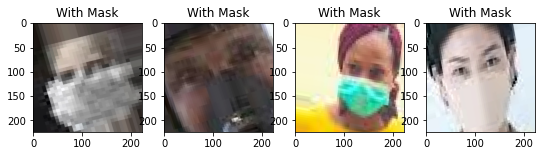

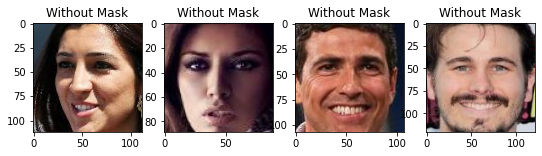

In [5]:
masked_images = os.listdir('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithMask')
unmasked_images = os.listdir('../input/face-mask-12k-images-dataset/Face Mask Dataset/Train/WithoutMask')

plt.figure(figsize = (9, 2))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(plt.imread(os.path.join(train_data + "/WithMask",masked_images[i])))
    plt.title("With Mask")

plt.figure(figsize = (9, 2))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(plt.imread(os.path.join(train_data + "/WithoutMask",unmasked_images[i])))
    plt.title("Without Mask")

**MobileNetV2 Architechure**

MobileNet-v2 is a convolutional neural network that is 53 layers deep. I can load a pre-trained version of the network trained on more than a million images from the ImageNet database. The pre-trained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

In [6]:
mobilenet = MobileNetV2(input_shape = (224, 224, 3), include_top = False)
for layer in mobilenet.layers:
    layer.trainable = False
    
mobilenet.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
________________

**Adding Base Layers to the Model**


it's useful to incrementally stack layers with add() and frequently print model summaries.

In [7]:
X = AveragePooling2D(pool_size=(7, 7))(mobilenet.output)
X = Flatten(name="flatten")(X)
X = Dense(64, activation="relu")(X)
X = Dropout(0.5)(X)
prediction = Dense(1, activation= 'sigmoid')(X)
model = Model(inputs = mobilenet.input, outputs = prediction)

**Model Compilation**

* **Optimization** is an important process which optimize the input weights by comparing the prediction and the loss function.
* **Loss:** function is used to find error or deviation in the learning process.
* **Metrics** is used to evaluate the performance of our model.

In [8]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

**Model Training**

Model training is the phase in the data science development lifecycle where practitioners try to fit the best combination of weights and bias to a deep learning algorithm to minimize a loss function over the prediction range.

In [9]:
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data= val_generator,
                    verbose = 1)

Epoch 1/20
313/313 [==============================] - 158s 478ms/step - loss: 0.3569 - accuracy: 0.8297 - val_loss: 0.0787 - val_accuracy: 0.9775
Epoch 2/20
313/313 [==============================] - 120s 382ms/step - loss: 0.0776 - accuracy: 0.9738 - val_loss: 0.0606 - val_accuracy: 0.9837
Epoch 3/20
313/313 [==============================] - 119s 379ms/step - loss: 0.0534 - accuracy: 0.9834 - val_loss: 0.0530 - val_accuracy: 0.9825
Epoch 4/20
313/313 [==============================] - 119s 378ms/step - loss: 0.0388 - accuracy: 0.9892 - val_loss: 0.0529 - val_accuracy: 0.9837
Epoch 5/20
313/313 [==============================] - 119s 379ms/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0505 - val_accuracy: 0.9812
Epoch 6/20
313/313 [==============================] - 121s 385ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0518 - val_accuracy: 0.9825
Epoch 7/20
313/313 [==============================] - 120s 383ms/step - loss: 0.0280 - accuracy: 0.9905 - val_loss: 0.0527 -

**Save for future**

Saving everything into a single archive in the TensorFlow SavedModel format (or in the older Keras H5 format). This is the standard practice.

In [10]:
model.save('Face_Mask_Detector.h5')

**Prediction on Model**

Making prediction for a single image

[[0.]]


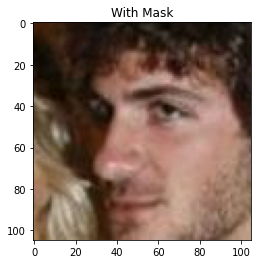

In [11]:
pred_img = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation/WithoutMask/1176.png'
image = tf.keras.preprocessing.image.load_img(path=pred_img,
                                             target_size=tuple(IMG_SIZE))

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  
predictions = model.predict(input_arr)
print(np.around(predictions))

if np.around(predictions) == 1:
    plt.title('Without Mask')
else:
    plt.title("With Mask")
plt.imshow(plt.imread(pred_img))


**I'm so grateful to see the project from beginning to end. We're all conscious to bring life back to the chest of this sick earth. We all wear masks for each other's well-being, for our own family. Everyone will be fine in this pandemic. Stay healthy.**